# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1644]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [937]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [1646]:
# Read the data
df = pd.read_csv("foodhub_order.csv")

In [1648]:
# View the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [1650]:
#Code to find the shape of the dataset
print("The dataset has",df.shape[0],"rows and",df.shape[1],"columns")

The dataset has 1898 rows and 9 columns


#### Observations:
The dataset has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [1652]:
# Data types of different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. order_id, customer_id, food_preparation time and delivery_time are numeric columns of integer data type
2. cost_of_the_order is a numeric column of float data type
3. restaurant_name, cuisine_type, day_of_the_week and rating are categorical columns of string data type

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [1654]:
# Find missing values in the dataset
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in any columns of the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [1656]:
#Find the statistical summary of data and round to 2 decimal places
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
1. The average food preparation time is 27.37 min with the values ranging from 20 min (minimum time) to 35 min (maximum time)
2. The average food delivery time is 24.16 min with the values ranging from 15 min (minimum time) to 33 min (maximum time)
3. The average cost of order is \\$16.5 with the cost ranging from \\$4.47 (minimum) to \\$35.41 (maximum)

### **Question 5:** How many orders are not rated? [1 mark]

In [1658]:
#Find the number of orders under each rating category
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Analyzing Order ID, Customer ID and Restaurants does not provide meaningful insights. 
Hence, the only analysis on these variables would be to find the unique values for each of them

In [1660]:
#Find the number of unique values for order id
df['order_id'].nunique()

1898

Observation : All orders have unique Order ID

In [1662]:
#Find the number of unique values for customer id
df['customer_id'].nunique()

1200

Observation : Out of 1898 orders, 1200 orders were from unique customers and the remaining 698 were from repeat customers

In [1664]:
#Find the number of unique values for Restaurants
df['restaurant_name'].nunique()

178

Observation : The orders were served by 178 different restaurants

### Analyzing cost_of_the_order, food_preparation time and delivery_time with histograms and boxplots

### Cost of Order

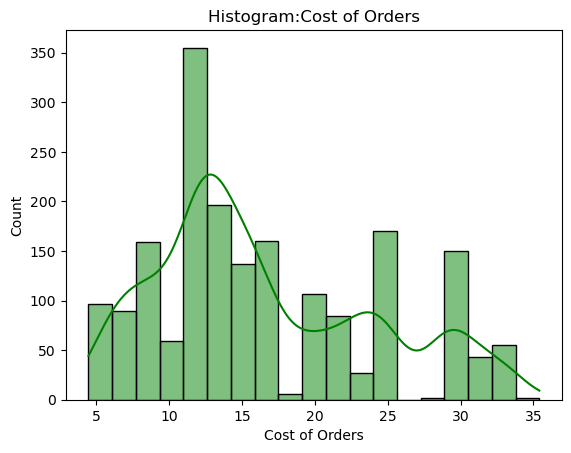

In [1666]:
#Customizations for Cost of Orders histogram
plt.title('Histogram:Cost of Orders')
plt.xlabel('Cost of Orders')
plt.ylabel('Count')
#Histogram for Cost of orders
sns.histplot(data=df, x='cost_of_the_order',color='green',kde=True);
plt.show()

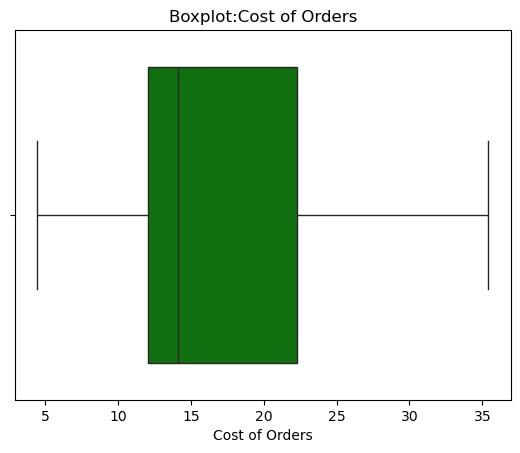

In [1668]:
#Customizations for Cost of Orders Box Plot
plt.title('Boxplot:Cost of Orders')
plt.xlabel('Cost of Orders')
sns.axes_style('whitegrid')
#Box Plot for Cost of Orders
sns.boxplot(data=df, x='cost_of_the_order',color='green');
plt.show()

### Observations:
1. Cost Of Order has a right skewed distribution.
2. Most number of orders cost between \\$11 and 1\\$3.
3. Median cost of all orders is around $14.
4. There are no visible outliers
5. Variability of data is between \\$12-\\$22 and Range of data is between \\$4-\\$35

### Food Preparation Time

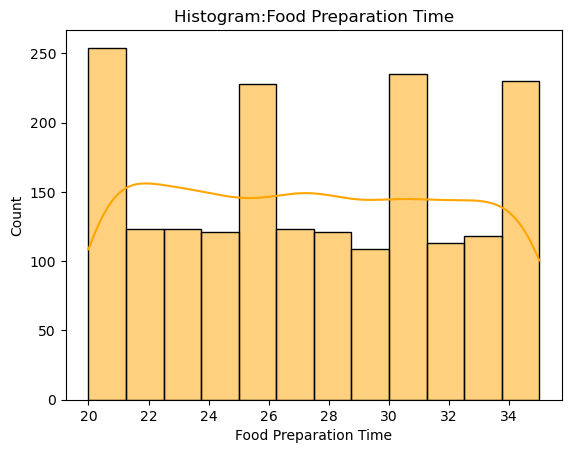

In [1670]:
#Customizations for Food Preparation Time histogram
plt.title('Histogram:Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Count')
#Histogram for Food Preparation Time
sns.histplot(data=df, x='food_preparation_time',color='orange',kde=True);
plt.show()

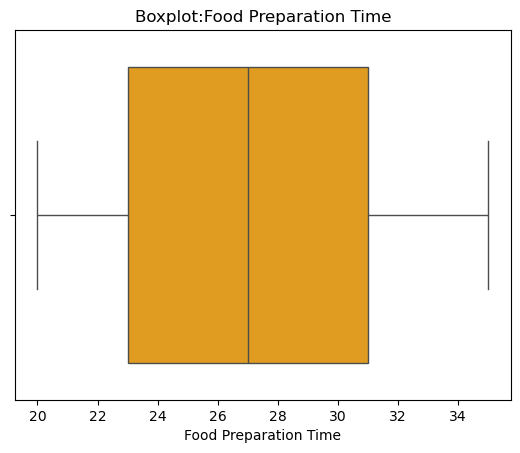

In [1672]:
#Customization for Food Preparation Time Box plot
plt.title('Boxplot:Food Preparation Time')
plt.xlabel('Food Preparation Time')
sns.axes_style('whitegrid')
#Box Plot for Food Preparation Time
sns.boxplot(data=df, x='food_preparation_time',color='orange');
plt.show()

### Observations :
1. Food preparation time has a uniform distribution
2. Median food preparation time is 27 minutes
3. There are no visible outliers
4. Variability of data is between 23min - 31min and Range of data is between 20min - 35min

### Delivery Time

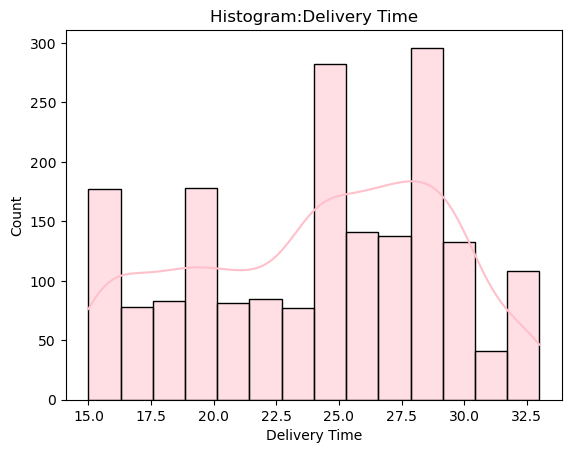

In [1674]:
# Customizations for Delivery Time histogram 
plt.title('Histogram:Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Count')
# Histogram for Delivery Time
sns.histplot(data=df, x='delivery_time',color='pink',kde=True);
plt.show()

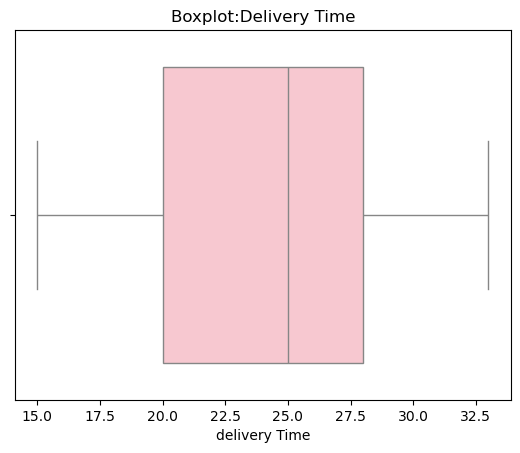

In [1676]:
# Customizations for Delivery Time Box Plot
plt.title('Boxplot:Delivery Time')
plt.xlabel('delivery Time')
sns.axes_style('whitegrid')
# Box Plot for Delivery Time
sns.boxplot(data=df, x='delivery_time',color='pink');
plt.show()

### Observations : 
1. Delivery Time has a left-skewed distribution
2. Median delivery time is around 25 min
3. Peak delivery times are between 24 min and 30 min
4. Variability of data is between 20-28.5min and Range of data is between 15-33min

### Analyzing cuisine_type, day_of_the_week and rating with countplots

### Cuisine Type

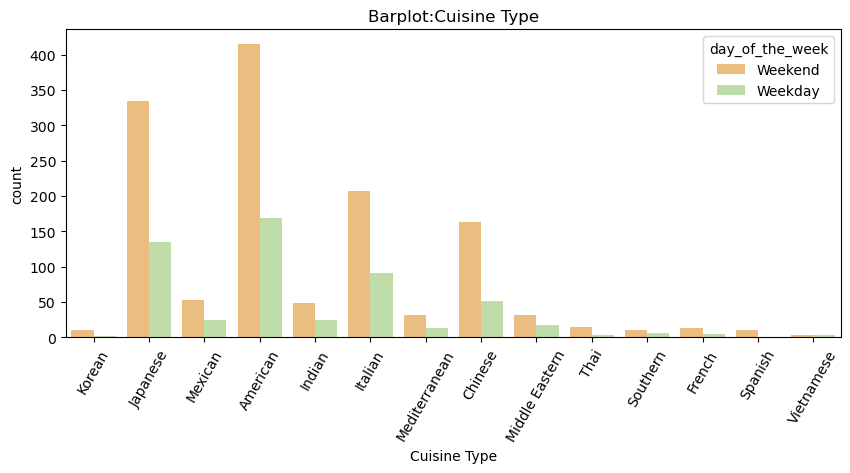

In [1678]:
# Customizations for Cuisine Type Barplot
plt.figure(figsize=(10,4))
plt.title('Barplot:Cuisine Type')
plt.xticks(rotation=60)
# BarPlot for Cuisine type
sns.countplot(data=df, x='cuisine_type', palette='Spectral', hue='day_of_the_week')
plt.xlabel('Cuisine Type');

### Observations : 
1. Most number of orders were placed for American cuisine followed by Japanese, Italian and chinese cuisine
2. Vietnamese cuisine was the least favourite cuisine
3. Weekends see more number of orders irrespective of the cuisine
4. Most favourite and Least favourite cuisines are unaffected by the day of the week. American is the favorite on weekends/weekdays and vietnamese is least favorite on both weekends and weekdays
5. Vietnamese cuisine sees almost similar number of orders on weekdays and weekends. 

### Day of the week

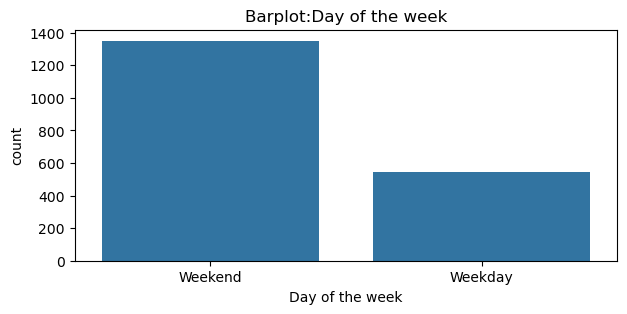

In [1680]:
#Customizations for Day of the week Bar Plot
plt.figure(figsize=(7,3))
plt.title('Barplot:Day of the week')
#BarPlot for Day of the week
sns.countplot(data=df, x='day_of_the_week')
plt.xlabel('Day of the week');

### Observations :
1. Number of orders placed on weekends is almost double the number of orders placed on weekdays
2. Irrespective of the type of Cuisine, order on weekends is greater than that on weekdays

### Ratings

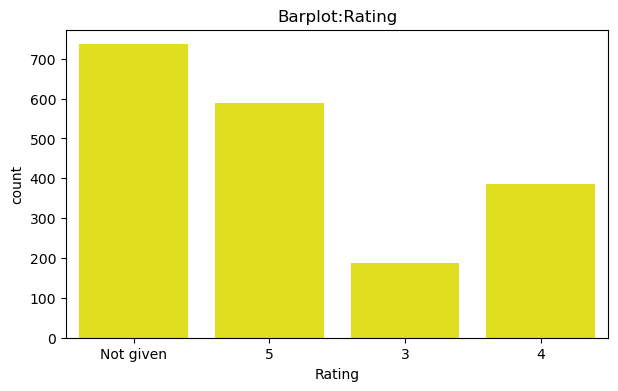

In [1682]:
# Customizations for Rating Bar plot
plt.figure(figsize=(7,4))
plt.title('Barplot:Rating')
# Bar Plot for Rating
sns.countplot(data=df, x='rating', color='yellow')
plt.xlabel('Rating');

### Observations : 
1. Ratings range from 3 to 5
2. Not all orders are rated
3. 736 orders are not rated (rating : Not given)
4. Unrated orders constitute to around 38.7% of all orders

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [1684]:
#Find the number of orders placed per restaurant
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
The top 5 restaurants that served the most number of orders were 
1. Shake Shack (219 orders),
2. The Meatball shop (132 orders), 
3. Blue Ribbon Sushi (119 orders),
4. Blue Ribbon Fried Chicken (96 orders),
5. Parm (68 orders)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [1686]:
#Find the number of orders placed on weekends
(df['day_of_the_week']=='Weekend').value_counts()

day_of_the_week
True     1351
False     547
Name: count, dtype: int64

In [1688]:
#Categorize the orders placed on weekends by the Cuisine Type
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
1. Out of the 1351 orders made during weekends, American cuisine was the most popular with 415 orders
2. Followed by Japanese, Italian and Chinese cuisine
3. Vietnamese was the least favorite

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [1691]:
#Create a dataframe which has orders with cost > $20
df_cost = df[df['cost_of_the_order']>20]

#Find the number of rows in the new dataframe
print("Number of orders with cost of order greater than $20 is",df_cost.shape[0])

#Calculate the percentage based onthe number of rows in the original dataframe
percent20 = ((df_cost.shape[0]/df.shape[0])*100)

print("Percentage of orders costing more than $20 =", round(percent20,2),"%") #round the percentage to 2 decimal places

Number of orders with cost of order greater than $20 is 555
Percentage of orders costing more than $20 = 29.24 %


#### Observations:
Out of the 1898 orders in the data set, 555 orders cost more than $20, which is around 29.24%.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [1693]:
#Calculate mean of column delivery time
mean_del = df['delivery_time'].mean()
print("Average delivery time is",round(mean_del,2),"minutes") #round to 2 decimal places

Average delivery time is 24.16 minutes


#### Observations:
Mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [1695]:
#Get the cumulative order count for each customer ID and display top 3
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
The following are the top 3 most frequent customers
1. Customer ID 52832 placed 13 orders
2. Customer ID 47440 placed 10 orders
3. Customer ID 83287 placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


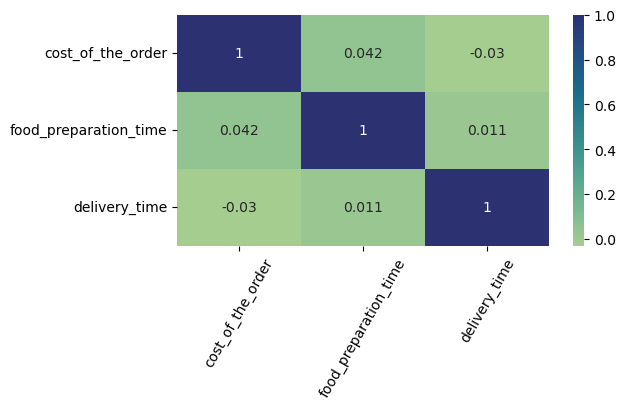

In [1697]:
# Plot the heatmap to find the numeric variables that have maximum correlation
plt.figure(figsize=(6, 3))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap="crest")
plt.xticks(rotation=60)
plt.show()

### Observations: 
1. The heatmap does not show very strong correlation between cost of order, food preparation time and food delivery time
2. Hence, multivariate analysis between these columns does not provide meaningful insights
3. There is a weak positive correlation between cost_of_the_order and food_preparation_time and between delivery_time and food_preparation_time
4. There is a weak negative correlation between cost_of_the_order and delivery_time

### Cuisine Type Vs Cost of Order

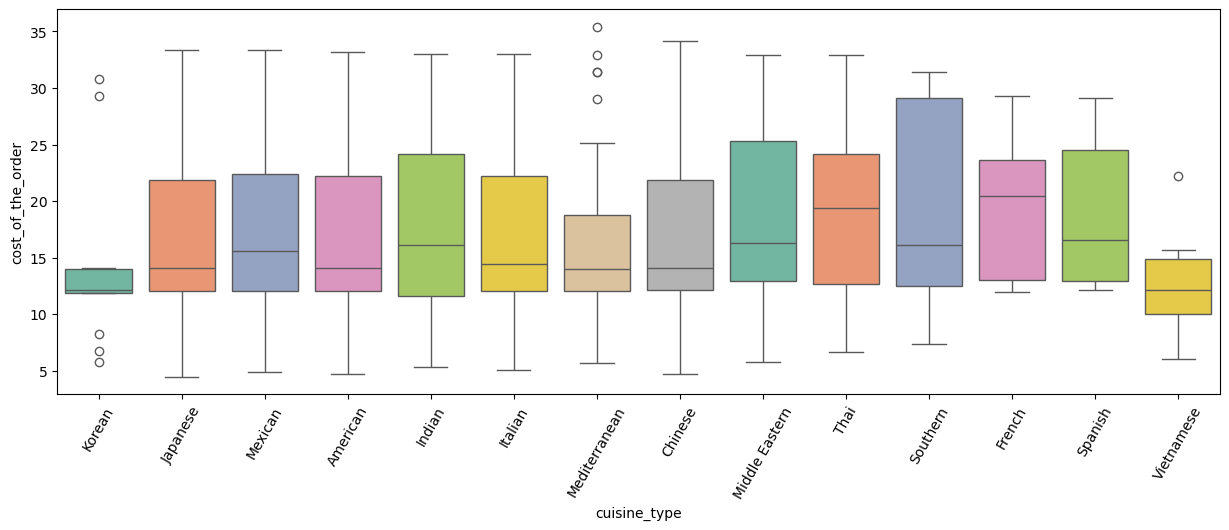

In [1699]:
#Create a box plot based on cost of order Vs cuisine type
plt.figure(figsize=(15,5))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette="Set2")
plt.xticks(rotation = 60)
plt.show()

### Observations:
1. Outliers are seen for Korean, Mediterranean and Vietnamese cuisines. These could be due to large orders or incorrect entry
2. Median cost is highest for French cuisine followed by Thai cuisine (\\$20-\\$21)
3. Median cost is lowest for Korean and Vietnamese cuisine (~$10)
4. Most cuisines show a right skewed distribution
5. Range of data and variability of data is too less for Korean and Vietnamese cuisine. This could be due to the very limited number of orders placed for these cuisines

### Cuisine Type Vs Rating

In [1701]:
#Create a new dataframe to sort by the rating column. The original dataframe is unaffected
df_new=df.sort_values(by='rating', ascending=False).reset_index()

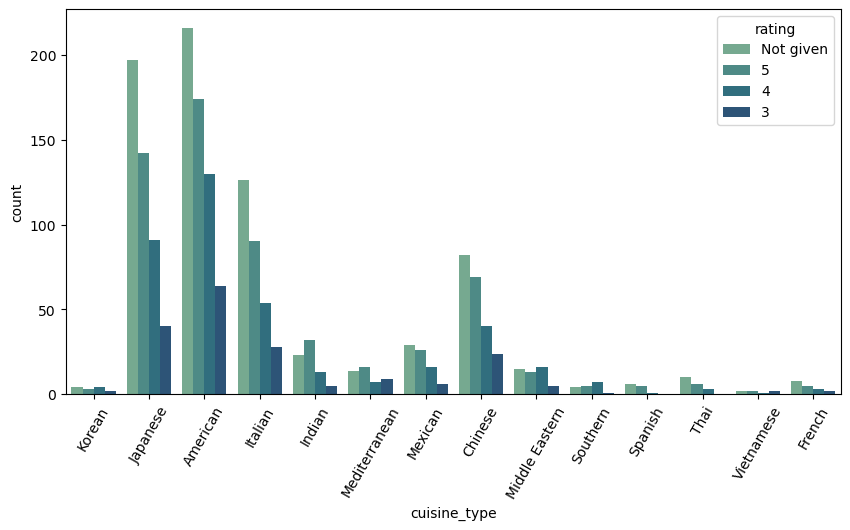

In [1642]:
#Create a count plot based on rating Vs cuisine type
plt.figure(figsize=(10,5))
sns.countplot(x = "cuisine_type", data = df_new, palette = 'crest', hue='rating')
plt.xticks(rotation = 60)
plt.show()

In [1703]:
#Count the ratings provided for each Cuisine type
df.groupby('cuisine_type')[['rating']].value_counts()

cuisine_type  rating   
American      Not given    216
              5            174
              4            130
              3             64
Chinese       Not given     82
                          ... 
Thai          4              3
Vietnamese    3              2
              5              2
              Not given      2
              4              1
Name: count, Length: 54, dtype: int64

### Observations:
1. Most Non rated orders were placed for American/Japanese cuisines
2. Spanish and Thai cuisines do not have orders that were rated 3

### Cuisine Type Vs Food Preparation Time

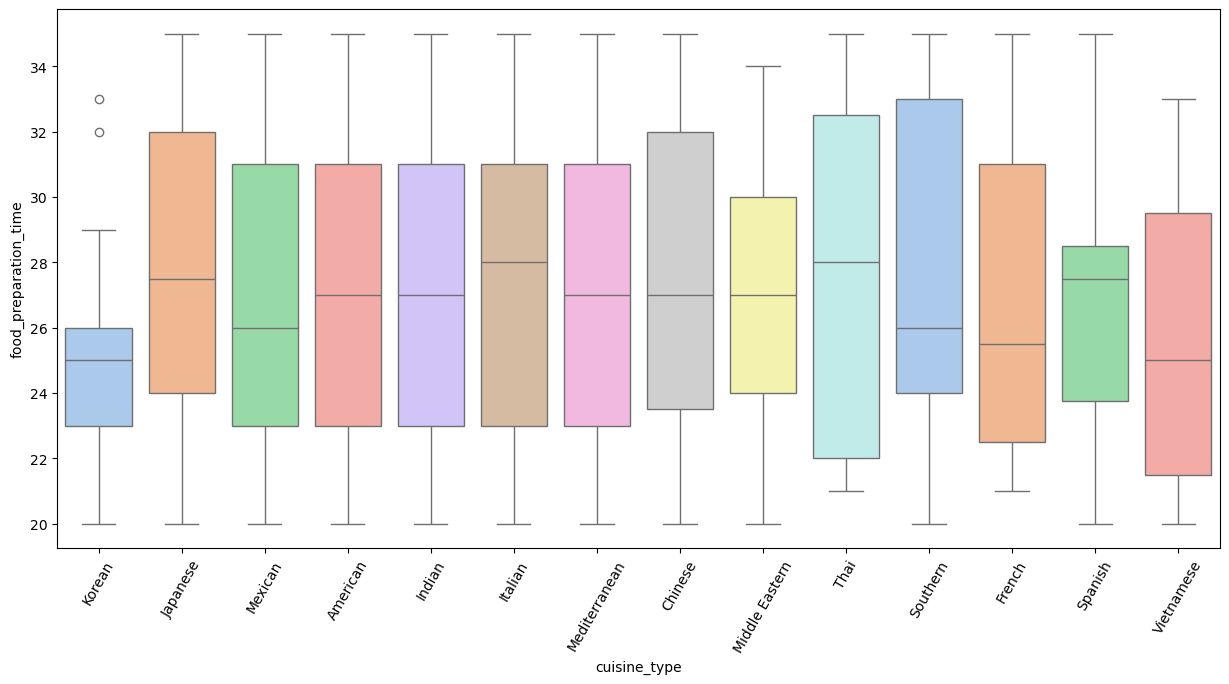

In [1705]:
#Create a box plot based on Cuisine type Vs food prep time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

### Observations:
1. Korean and Vietnamese cuisine has lower 'Maximum food preparation time' than other cuisines
2. Thai and French cuisine has a higher 'Minimum food preparation time' than other cuisines
3. Korean cuisine shows few outliers that might be due to large order volume or unavailability of resources.
4. Koren and Vietnamese cuisines have the lowest Mean Food preparation time
5. Korean, Italian and Spanish cuisines show a left skewed distribution
6. Japanese, Mexican, Southern, French cuisines show a right skewed distribution
7. All other cuisines show a normal distribution

### Cuisine type Vs Delivery Time

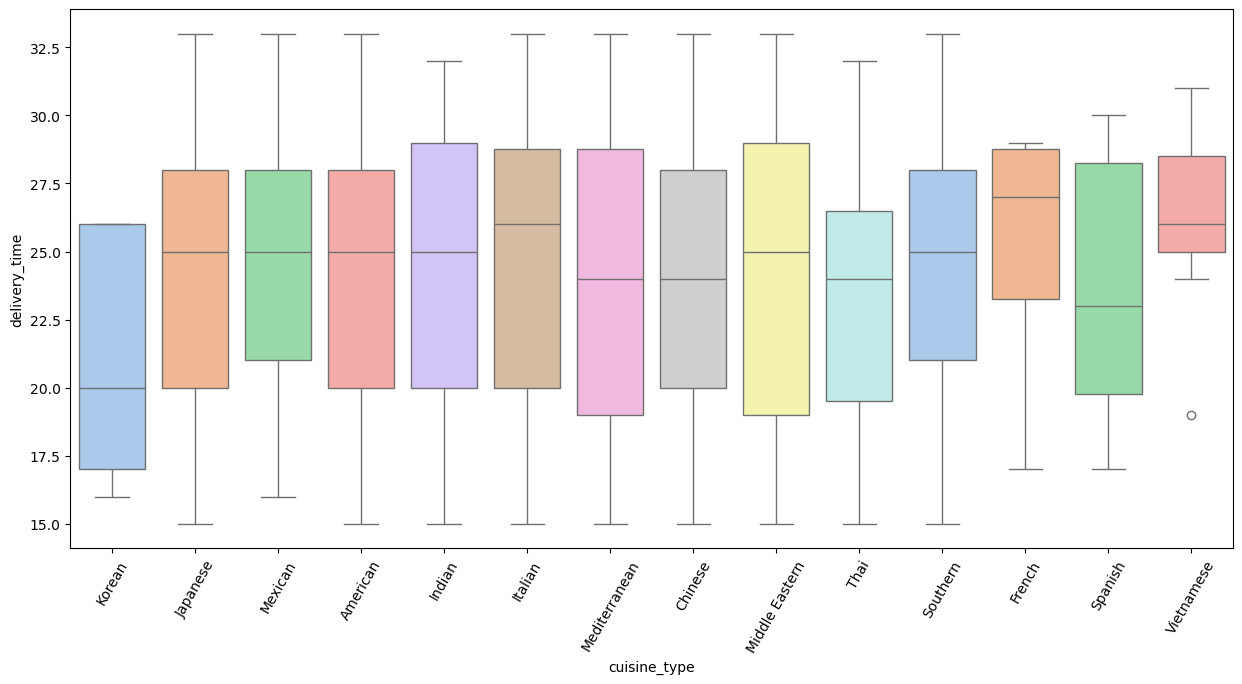

In [1707]:
#Create a box plot based on cuisine type Vs delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

### Observations:
1. Vietnamese cuisine has a very high delivery time as compared to other cuisines. This might be due to very less number of restaurants serving Vietnamese cuisine
2. There is one outlier for Vietnamese cuisine with a very low delivery time. Considering the other data points for Vietnamese cuisine, this might be a mistake
3. Korean cuisine  has the least median delivery time

### Day of the week Vs Delivery time

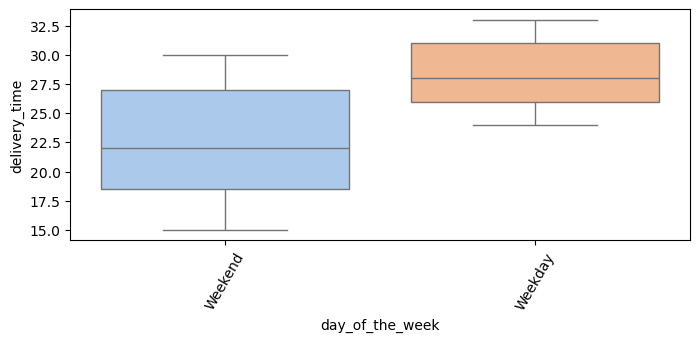

In [1709]:
#Create a box plot based on Day Vs delivery time
plt.figure(figsize=(8,3))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'pastel', hue = "day_of_the_week")
plt.xticks(rotation = 60)
plt.show()

### Observations :
1. Average Delivery time of weekends is lesser than that on Weekdays
2. Reason for reduced delivery times on weekends might be increase in available resources
3. Variability of delivery time is between 18-27min on weekends and between 27-31min on weekdays
4. Range od data is between 15-30min for weekends and 24-33min for weekdays

### Cost of the Order Vs Rating

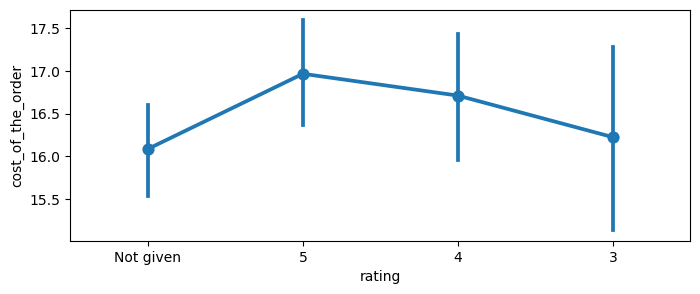

In [1711]:
#Create a point plot based on rating Vs cost of order
plt.figure(figsize=(8,3))
sns.pointplot(y = "cost_of_the_order", data = df_new, x = 'rating')
plt.show()

### Observations:
1. For the orders that are rated, the graph shows a positive correlation
2. As the cost of the order increases, the rating provided also increases
3. 'Not Given' rating and rating 3 have similar variability
4. 'Not Given' rating has to be imputed with proper values to get better insights from this graph

### Food Preparation time Vs Rating

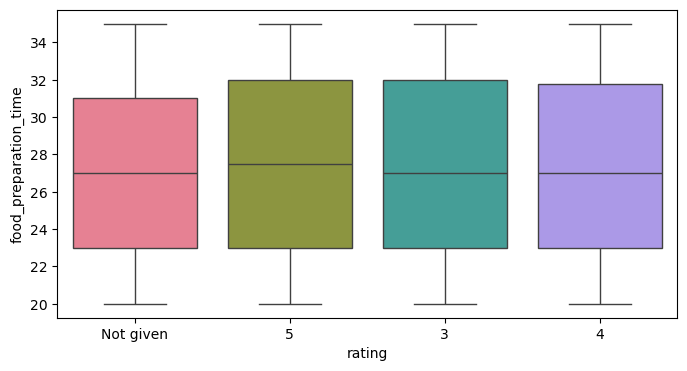

In [1713]:
#Create a box plot based on rating Vs food prep time
plt.figure(figsize=(8,4))
sns.boxplot(x = "rating", y = "food_preparation_time", data = df, palette = 'husl')
plt.show()

### Observations:
1. Min/Max and Median values for all ratings have very low variability with food preparation time
2. As the Not rated orders constitute to 38% of the dataset, we may have to impute the missing ratings to get a clear insight

### Deliver Time Vs Rating

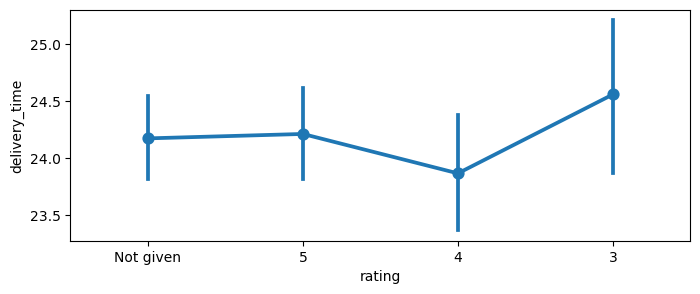

In [1715]:
#Create a point plot based on rating Vs delivery time
plt.figure(figsize=(8,3))
sns.pointplot(x = "rating", y = "delivery_time", data = df_new)
plt.show()

### Observations:
1. Delivery Time and Rating have negative correlation
2. When deivery time increases, the rating decreases
3. Orders with rating 5 and non rated orders have similar delivery times
4. As the Not rated orders constitute to 38% of the dataset, we may have to impute the missing ratings to get a clear insight

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [1717]:
#1 Creating a new DF by avoiding only the 'Not Given' rating. The original dataset is unaffected
rated_df = df[df['rating'] != 'Not given'].copy()

#2 Creating a new DF from the DF copied in step 1. Grouping the Ratings based on Restaurant name
rated_df_withcount= rated_df.groupby(['restaurant_name'])['rating'].count().reset_index().sort_values(by='rating',ascending=False)

#3 Renamed the column name from 'Rating' to 'Rating Count'
rated_df_withcount.rename(columns= {'rating':'rating_count'} ,inplace=True)

rated_df_withcount.head()

,restaurant_name,rating_count
117,Shake Shack,133
132,The Meatball Shop,84
17,Blue Ribbon Sushi,73
16,Blue Ribbon Fried Chicken,64
104,RedFarm Broadway,41


In [1719]:
#4 Datatype of 'Rating' column is Object(string). Convert to int datatype to calculate mean.Original dataset is unaffected
rated_df['rating'] = rated_df['rating'].astype('int')

#5 Creating a new DF from the DF copied in step 5. Grouping the Ratings based on Restaurant name and calculating mean
rated_df_withmean = rated_df.groupby(['restaurant_name'])['rating'].mean().reset_index().sort_values(by='rating',ascending=False)

#6 Renamed the column name from 'Rating' to 'Rating Mean'
rated_df_withmean.rename(columns= {'rating':'rating_mean'} ,inplace=True) 

rated_df_withmean.head()

,restaurant_name,rating_mean
0,'wichcraft,5.0
103,Ravagh Persian Grill,5.0
33,Chola Eclectic Indian Cuisine,5.0
34,Chote Nawab,5.0
71,Junoon,5.0


In [1721]:
#7 Merge the 2 DF with rating count and rating mean on restaurant name column
df_final = pd.merge(rated_df_withcount,rated_df_withmean,on='restaurant_name',how='inner')

#8 Keep only the rows where Rating count is > 50 and Average rating > 4
df_for_final_discounts=df_final[(df_final['rating_count'] > 50) & (df_final['rating_mean'] > 4)].sort_values(by='rating_mean',ascending=False).reset_index(drop=True)
df_for_final_discounts

,restaurant_name,rating_count,rating_mean
0,The Meatball Shop,84,4.511905
1,Blue Ribbon Fried Chicken,64,4.328125
2,Shake Shack,133,4.278195
3,Blue Ribbon Sushi,73,4.219178


#### Observations:
There are 4 restaurants which qualify for the promotional offer with an Average Rating greater than 4 and Rating count greater than 50
1. The Meatball Shop has an average rating of 4.51 from 84 reviews
2. Blue Ribbon Fried Chicken has an average rating of 4.33 from 64 reviews
3. Shake Shack has an average rating of 4.28 from 133 reviews
4. Blue Ribbon Sushi has an average rating of 4.22 from 73 reviews

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [1723]:
# Create a function that takes cost of order as input and generates revenue based on the condition mentioned
def app_revenue(cost):
    if cost > 20:
        return cost*0.25
    elif cost > 5:
        return cost*0.15
    else:
        return 0
#Add a new column app_order_revenue which shows the revenue for each order
df['app_order_revenue'] = df['cost_of_the_order'].apply(app_revenue) 
print("Net Revenue generated across all orders :$",df['app_order_revenue'].sum()) #calculate sum of revenue for all orders

Net Revenue generated across all orders :$ 6166.303


In [1725]:
#Categorize revenue generated based on restaurant
df.groupby('restaurant_name')[['app_order_revenue']].sum().sort_values(by='app_order_revenue',ascending=False).head(5)

,app_order_revenue
restaurant_name,
Shake Shack,703.6070
The Meatball Shop,419.8285
Blue Ribbon Sushi,360.4605
Blue Ribbon Fried Chicken,340.2035
Parm,218.5570


### Observations:
1. FoodHub generated \\$6166.303 from the 1898 orders
2. Shake Shack was the restaurant that generated max revenue
3. American Cuisine is the greatest contributor to the company revenue

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [1731]:
#tCalculate total_time = food prep time + delivery time and add the colum in df
df['total_time']=df['food_preparation_time']+df['delivery_time']
percent60 = df[df['total_time']>60].shape[0] #shape[0] gives the number of rows with condition total time > 60
print("No. of orders that crossed 60min delivery time : ",percent60)
#calculate the percentage and round to 2 places
print("percentage of orders with more than 60min delivery time : ", round((percent60/df.shape[0])*100,2),"%") 

No. of orders that crossed 60min delivery time :  200
percentage of orders with more than 60min delivery time :  10.54 %


#### Observations:
Out of the 1898 orders analyzed in the dataset, 200 orders had a delivery time greater than 60 min

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [1733]:
#finding the dataframe where day matches weekday or weekend and finding mean of delivery time
print("Weekday mean = ", df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
print("Weekend mean = ", df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())

Weekday mean =  28.340036563071298
Weekend mean =  22.4700222057735


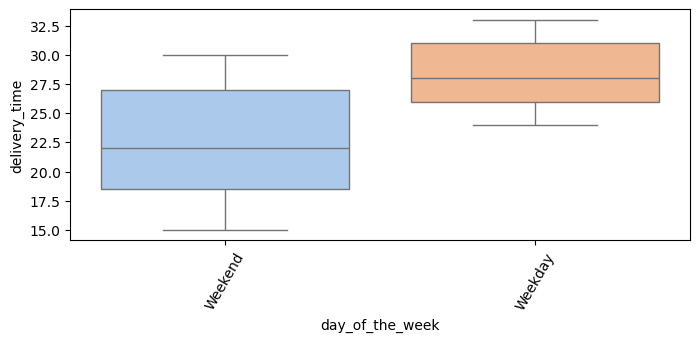

In [1735]:
#The same can be correlated with the following graph
plt.figure(figsize=(8,3))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'pastel', hue = "day_of_the_week") #create boxplot with 2 variables
plt.xticks(rotation = 60)
plt.show()

### Observation
On an average, the delivery time on weekends is lesser than that on weekdays by approximately 6 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. The dataset has 1898 rows and 9 columns with no missing values for any columns
2. Out of all orders, 736 orders are not rated
3. 1162 orders are rated between 3 and 5.
4. Orders were placed by 1200 unique customers from 178 different restaurants
5. The orders placed were from 14 different cuisines
6. American cuisine was the most favorite followed by Japanese cuisine
7. Vietnamese was the least favorite cuisine
8. More orders were placed on Weekends than on Weekdays

### Recommendations:
1. Delivery time was lesser on weekends as compared to weekdays. This might be due to the increased number of resources available on weekends for delivery
2. Delivery time on weekdays have to be improved. As delivery time increases, the rating provided decreases. This could be achieved by employing more drivers to deliver the order
3. Vietnamese has max preparation/delivery time considering the very low revenue generated by the cuisine - find more restaurants
4. Lot of Not Rated orders degrade the quality of the dataset. Customers should be encouraged to leave rating for the orders. Customers can be incentivized with some discount vouchers/raffle tickets for rating orders

---